In [343]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import geopandas as gpd

In [344]:
# Ebola 데이터 읽기
ebola = pd.read_csv('data/ebola_2014-2016.csv')

In [345]:
# Ebola의 Date 컬럼을 datetime 타입으로 변경
ebola.Date = pd.to_datetime(ebola['Date'], format='%Y-%m-%d')

In [346]:
# 데이터를 2014, 2015, 2016으로 나누기
mask_2014 = (ebola['Date'] >= '2014-01-01') & (ebola['Date'] <= '2014-12-31')
mask_2015 = (ebola['Date'] >= '2015-01-01') & (ebola['Date'] <= '2015-12-31')
mask_2016 = (ebola['Date'] >= '2016-01-01') & (ebola['Date'] <= '2016-12-31')

In [347]:
ebola2014 = ebola.loc[mask_2014]
ebola2015 = ebola.loc[mask_2015]
ebola2016 = ebola.loc[mask_2016]

In [348]:
# 2015, 2016년 데이터를 상 하반기로 나누기. ( 2014년 데이터는 하반기부터 시작됨. 2016년 데이터는 하반기가 없음. )
mask_2015_first = (ebola2015['Date'] >= '2015-01-01') & (ebola2015['Date'] <= '2015-06-30')
mask_2015_second = (ebola2015['Date'] >= '2015-07-01') & (ebola2015['Date'] <= '2015-12-31')

mask_2016 = (ebola2016['Date'] >= '2016-01-01') & (ebola2016['Date'] <= '2016-06-30')

In [349]:
"""
데이터셋
    ebola2014
    ebola2015_first, ebola2015_second
    ebola2016_first, ebola2016_second
"""
ebola2015_first = ebola2015.loc[mask_2015_first]
ebola2015_second = ebola2015.loc[mask_2015_second]

ebola2016 = ebola2016.loc[mask_2016]

In [350]:
ebola2014_cases = ebola2014.Cases.sum()
ebola2014_deaths = ebola2014.Deaths.sum()

ebola2015_first_cases = ebola2015_first.Cases.sum()
ebola2015_first_deaths = ebola2015_first.Deaths.sum()
ebola2015_second_cases = ebola2015_second.Cases.sum()
ebola2015_second_deaths = ebola2015_second.Deaths.sum()

ebola2016_cases = ebola2016.Cases.sum()
ebola2016_deaths = ebola2016.Deaths.sum()

In [351]:
ebola_dataset = pd.DataFrame(
    data= {
        'Cases': [ebola2014_cases, ebola2015_first_cases, ebola2015_second_cases, ebola2016_cases],
        'Deaths': [ebola2014_deaths, ebola2015_first_deaths, ebola2015_second_deaths, ebola2016_deaths]
    },

    index= ['2014', '2015_first', '2015_second', '2016'],
    columns= ['Cases', 'Deaths']
)

In [352]:
ebola_dataset

,Cases,Deaths
2014,470337.0,188461.0
2015_first,2836740.0,1157729.0
2015_second,2989743.0,1197935.0
2016,28642.0,11319.0


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

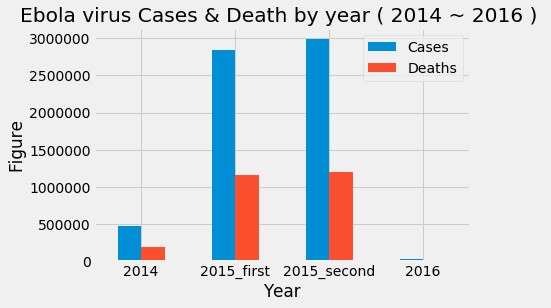

In [353]:
matplotlib.style.use('fivethirtyeight')
ebola_dataset.plot(kind='bar')
plt.title('Ebola virus Cases & Death by year ( 2014 ~ 2016 ) ')
plt.xlabel('Year')
plt.ylabel('Figure')
plt.xticks(rotation=0, horizontalalignment='center')

In [365]:
# 세계지도 정보 가져오기
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [366]:
# 데이터셋에서 각 나라의 Cases와 Deaths를 반환하는 함수
def retrn_groupData(dataset, country):
    return [dataset.loc[dataset['Country'] == country].Cases.sum(), dataset.loc[dataset['Country'] == country].Deaths.sum()]

In [367]:
"""
ebola2014 -> e2014
ebola2015 -> e2015
ebola2016 -> e2016
"""

e2014 = pd.DataFrame(
    data={
        'Country': ebola2014['Country'].unique(),
        'Cases': [retrn_groupData(ebola2014, x)[0] for x in ebola2014['Country'].unique()],
        'Deaths': [retrn_groupData(ebola2014, x)[1] for x in ebola2014['Country'].unique()]
    },
    columns=['Country', 'Cases', 'Deaths']
)

e2015 = pd.DataFrame(
    data={
        'Country': ebola2015['Country'].unique(),
        'Cases': [retrn_groupData(ebola2015, x)[0] for x in ebola2015['Country'].unique()],
        'Deaths': [retrn_groupData(ebola2015, x)[1] for x in ebola2015['Country'].unique()]
    },

    columns=['Country', 'Cases', 'Deaths']
)

e2016 = pd.DataFrame(
    data={
        'Country': ebola2016['Country'].unique(),
        'Cases': [retrn_groupData(ebola2016, x)[0] for x in ebola2016['Country'].unique()],
        'Deaths': [retrn_groupData(ebola2016, x)[1] for x in ebola2016['Country'].unique()]
    },

    columns=['Country', 'Cases', 'Deaths']
)


In [368]:
# Cases와 Deaths를 int, float으로 변환
def setInt(x):
    if x.name != 'Country':
        x = x.astype(int)

e2014.apply(setInt)
e2015.apply(setInt)
e2016.apply(setInt)

Country    None
Cases      None
Deaths     None
dtype: object

In [369]:
e2016

,Country,Cases,Deaths
0,Guinea,3804.0,2536.0
1,Spain,1.0,0.0
2,Sierra Leone,14122.0,3955.0
3,Senegal,1.0,0.0
4,Mali,8.0,6.0
5,United Kingdom,1.0,0.0
6,Liberia,10680.0,4813.0
7,Italy,1.0,0.0
8,Nigeria,20.0,8.0
9,United States of America,4.0,1.0


In [370]:
def set_lower_data2014(x):
    if x >= 1000:
        return x * 1/100
    else:
        return x

def set_lower_data2015(x):
    if x >= 10000:
        return x * 1/100
    else:
        return x

def set_lower_data2016(x):
    if x >= 1000:
        return x * 1/100
    else:
        return x

e2014['Cases'] = e2014['Cases'].apply(set_lower_data2014)
e2014['Deaths'] = e2014['Deaths'].apply(set_lower_data2014)
e2015['Cases'] = e2015['Cases'].apply(set_lower_data2015)
e2015['Deaths'] = e2015['Deaths'].apply(set_lower_data2015)
e2016['Cases'] = e2016['Cases'].apply(set_lower_data2016)
e2016['Deaths'] = e2016['Deaths'].apply(set_lower_data2016)

In [371]:
# Country와 Geometry column만 남기고 모두 drop.
countries = countries.drop(['pop_est', 'continent', 'iso_a3', 'gdp_md_est'], axis=1)

In [372]:
def set_countries(dataset):

    countries['Cases'] = 0
    countries['Deaths'] = 0

    for i in range(countries.shape[0]):
        if countries.loc[i, 'name'] in list(dataset['Country']):
            country = countries['name'].loc[i]
            print(country)
            cases = dataset['Cases'].loc[dataset['Country'] == country].to_numpy()[0]
            print(cases)
            deaths = dataset['Deaths'].loc[dataset['Country'] == country].to_numpy()[0]
            print(deaths)

            countries.loc[i, 'Cases'] = cases
            countries.loc[i, 'Deaths'] = deaths
    
    return countries

In [373]:
countries2014 = set_countries(e2014)
countries2015 = set_countries(e2015)
countries2016 = set_countries(e2016)

United States of America
99.0
25.0
Senegal
41.0
0.0
Mali
129.0
101.0
Nigeria
765.0
303.0
Guinea
661.9
404.62
Liberia
2107.96
956.25
Sierra Leone
1922.91
519.45
Spain
26.0
0.0
United States of America
864.0
216.0
Senegal
216.0
0.0
Mali
1728.0
1320.0
Nigeria
4320.0
1728.0
Guinea
7841.24
5200.71
Liberia
22376.46
9993.95
Sierra Leone
27970.15
8329.34
Spain
216.0
0.0
Italy
140.0
0.0
United Kingdom
214.0
0.0
United States of America
4.0
1.0
Senegal
1.0
0.0
Mali
8.0
6.0
Nigeria
20.0
8.0
Guinea
38.04
25.36
Liberia
106.8
48.13
Sierra Leone
141.22
39.55
Spain
1.0
0.0
Italy
1.0
0.0
United Kingdom
1.0
0.0


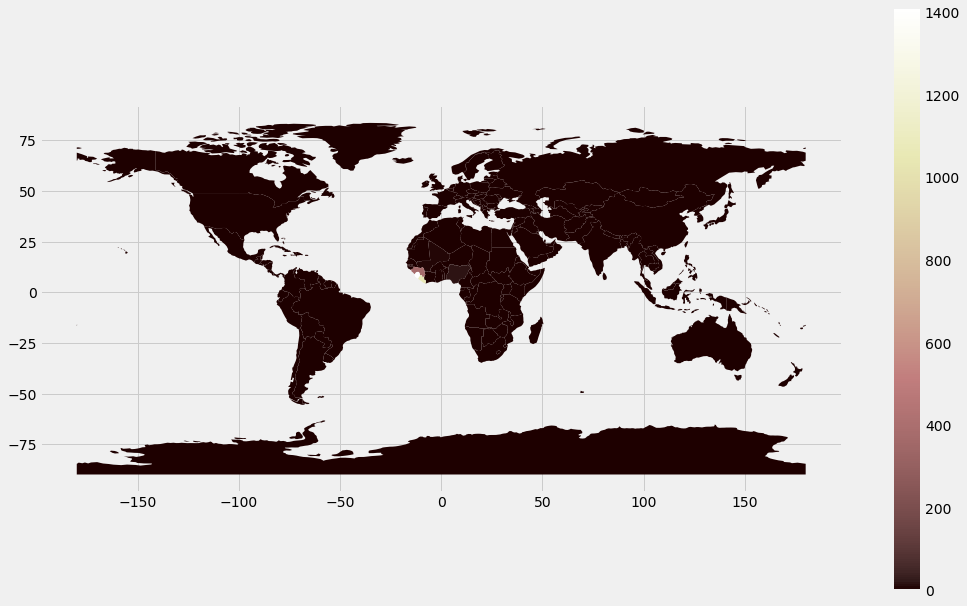

In [363]:
countries2015.plot(column='Cases', figsize=(16, 10), cmap='pink', legend=True)

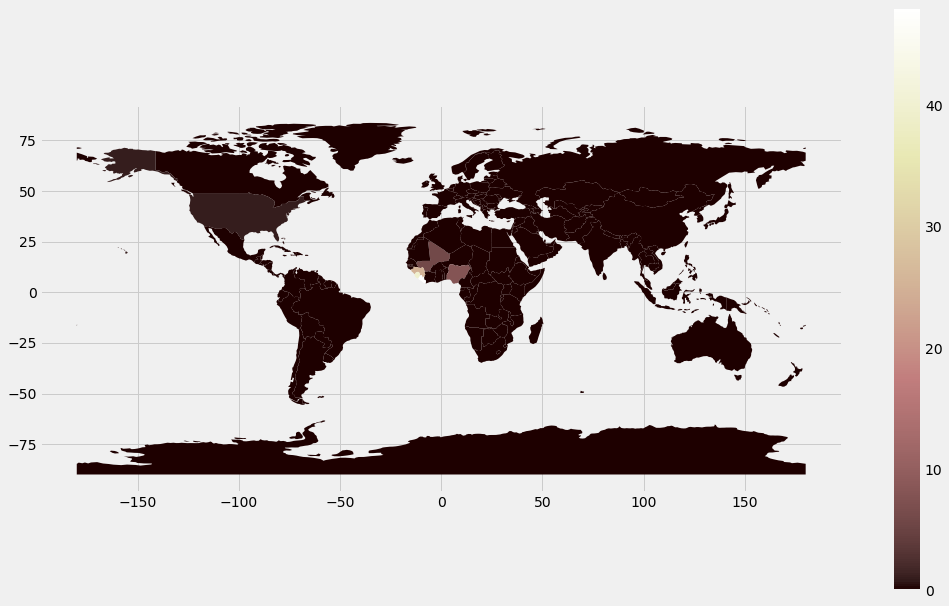

In [374]:
countries2015.plot(column='Deaths', figsize=(16, 10), cmap='pink', legend=True)

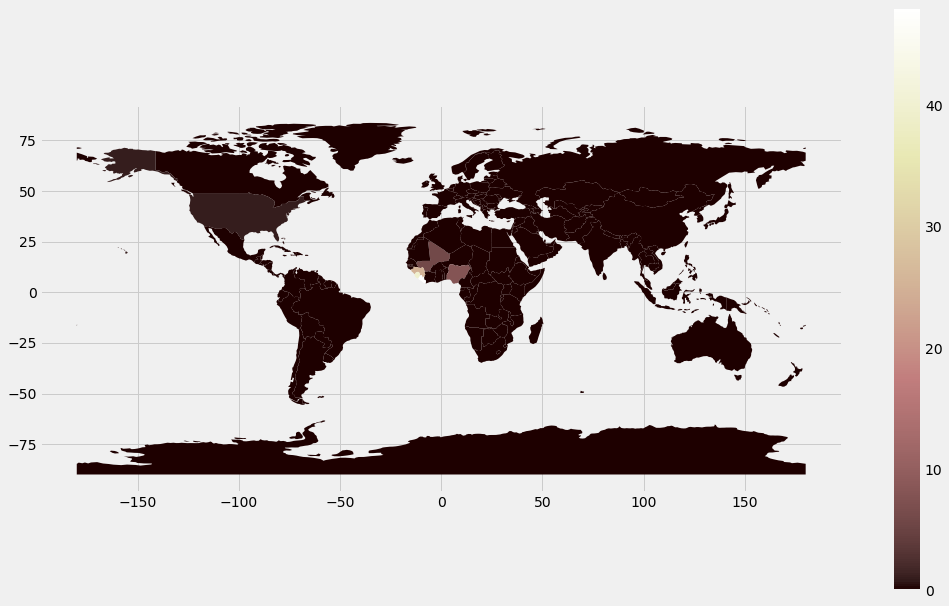

In [375]:
countries2016.plot(column='Deaths', figsize=(16, 10), cmap='pink', legend=True)